Regression : Its a phenomenon where dependent variable (or Outcome Variable, Response, Target) tends to 
regress (or drift towards) the mean (average) of the predictors(covariate, regressor, input variables, independent variables)

The goal of Linear Regression is to minimize the vertical distance between all the data points and our line.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

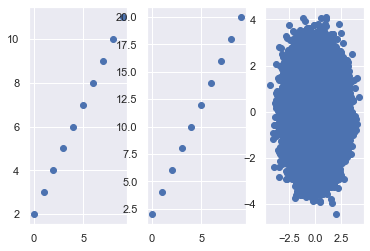

<Figure size 1080x432 with 0 Axes>

In [2]:
x = pd.Series(np.arange(10))
fig,ax = plt.subplots(1,3)
plt.figure(figsize=(15,6))
ax[0].scatter(x,x+2)
ax[1].scatter(x,2*x+2)


x1 = pd.Series(np.random.randn(100000))
y1 = pd.Series(np.random.randn(100000))

ax[2].scatter(x1,y1)

## Load Data from Source into DataFrame

In [3]:
#Read the data from the Sourec File into a DataFrame
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
df.shape

(5000, 7)

## Exploratory Data Analysis (EDA)

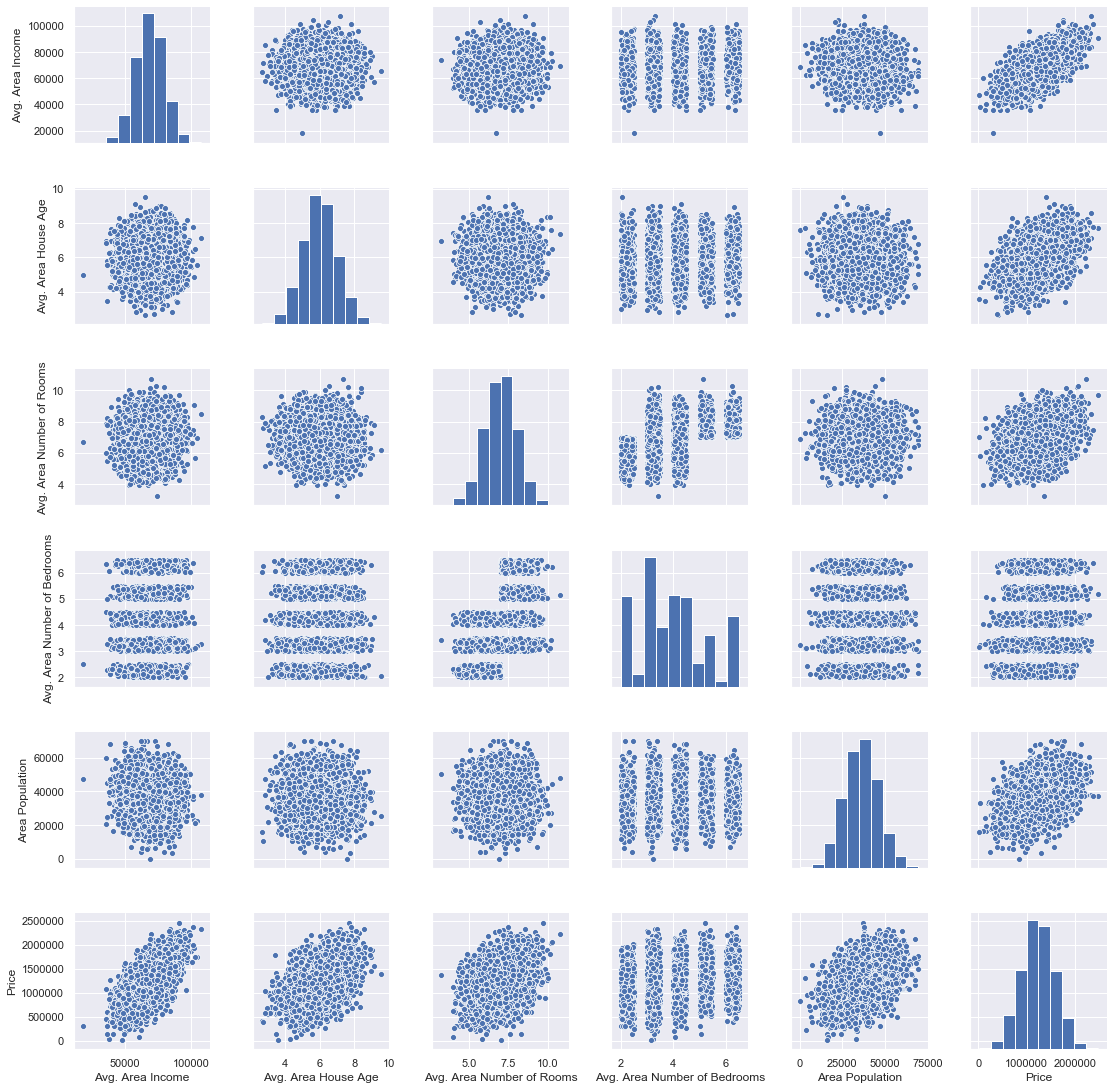

In [9]:
sns.pairplot(data=df)

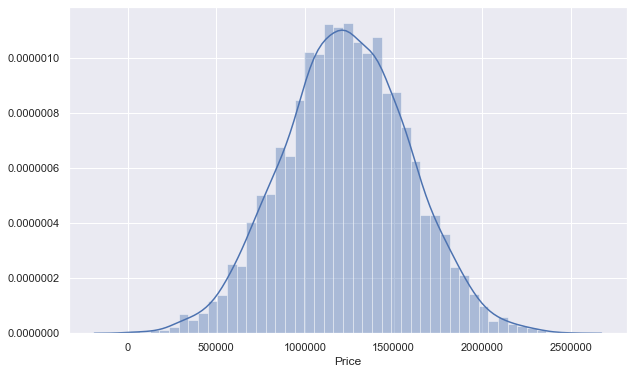

In [11]:
# We want to predict the price of a house in this assignment. Lets see the distribution of price in the Data set.
plt.figure(figsize=(10,6))
sns.distplot(df['Price'])

#df.corr()

In [ ]:
#In the below cells, I am trying to define the bins and distribute Price array among those bins to understand the price data distribution

In [13]:
df['Price'].min()

15938.657923287848

In [14]:
df['Price'].max()

2469065.5941747027

In [37]:
bins=[]
for i in range(10000, 3000000, 100000):
    bins.append(i)

In [38]:
len(bins)

30

In [39]:
price_arr = df['Price'].values

In [40]:
type(price_arr)

numpy.ndarray

In [41]:
price_arr.shape

(5000,)

In [42]:
price_arr

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [43]:
price_dist = pd.cut(price_arr,bins)

In [44]:
price_dist

[(1010000, 1110000], (1410000, 1510000], (1010000, 1110000], (1210000, 1310000], (610000, 710000], ..., (1010000, 1110000], (1410000, 1510000], (1010000, 1110000], (1110000, 1210000], (1210000, 1310000]]
Length: 5000
Categories (29, interval[int64]): [(10000, 110000] < (110000, 210000] < (210000, 310000] < (310000, 410000] ... (2510000, 2610000] < (2610000, 2710000] < (2710000, 2810000] < (2810000, 2910000]]

In [45]:
price_dist.value_counts()

(10000, 110000]         3
(110000, 210000]        4
(210000, 310000]       17
(310000, 410000]       28
(410000, 510000]       49
(510000, 610000]       94
(610000, 710000]      156
(710000, 810000]      244
(810000, 910000]      314
(910000, 1010000]     403
(1010000, 1110000]    512
(1110000, 1210000]    551
(1210000, 1310000]    571
(1310000, 1410000]    505
(1410000, 1510000]    451
(1510000, 1610000]    395
(1610000, 1710000]    258
(1710000, 1810000]    185
(1810000, 1910000]    127
(1910000, 2010000]     67
(2010000, 2110000]     34
(2110000, 2210000]     17
(2210000, 2310000]     10
(2310000, 2410000]      4
(2410000, 2510000]      1
(2510000, 2610000]      0
(2610000, 2710000]      0
(2710000, 2810000]      0
(2810000, 2910000]      0
dtype: int64

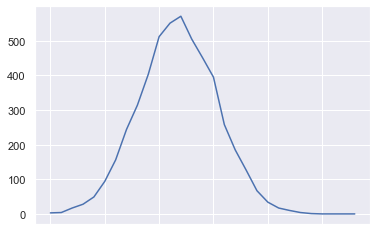

In [46]:
price_dist.value_counts().plot()

In [ ]:
#Correlation between Features

In [47]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


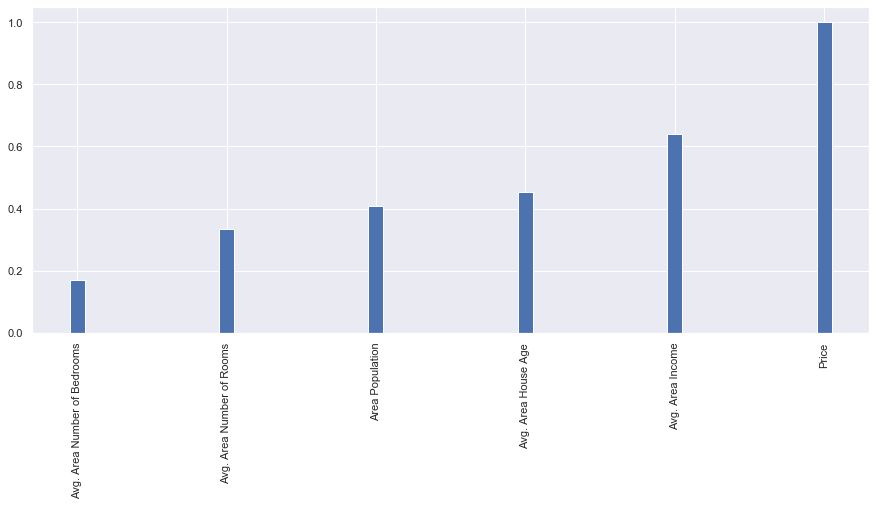

In [58]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values().plot(kind='bar',width=0.1)

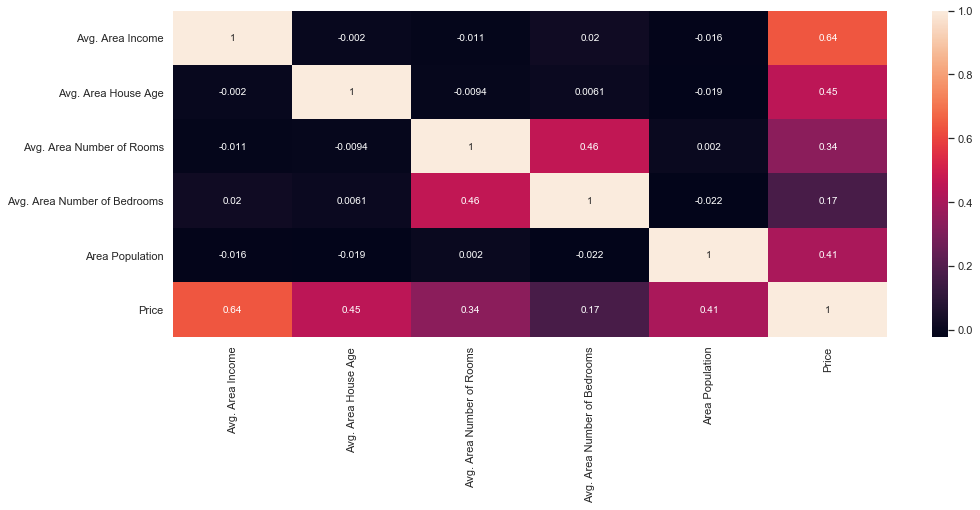

In [60]:
#Heatmap of the Correaltion
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),annot = True)

In [62]:
df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [29]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [66]:
#Check if there are any null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [72]:
#Get the Attributes that has String values (non numeric Values)
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [77]:
df.select_dtypes(include='object').columns

Index(['Address'], dtype='object')

In [92]:
for c in df.columns:
    #print('Column Name : ',c,' Type : ',type(df.loc[1,c]))
    x= type(df.loc[1,c])
    print(x)   

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>


## Train Test Split

In [90]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [94]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [95]:
y = df['Price']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [98]:
X_train.shape

(3000, 5)

In [112]:
X_test.shape

(2000, 5)

In [111]:
#Below are the plots of the Distribution of Target Label 'price' in Original, Training and Test Data Set

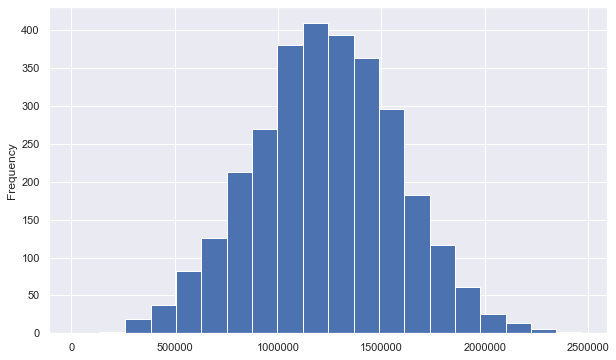

In [106]:
y_train.plot(kind='hist',bins=20,figsize=(10,6))

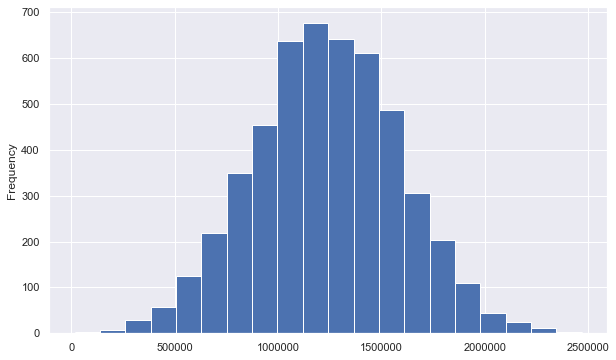

In [107]:
df['Price'].plot(kind='hist',bins=20,figsize=(10,6))

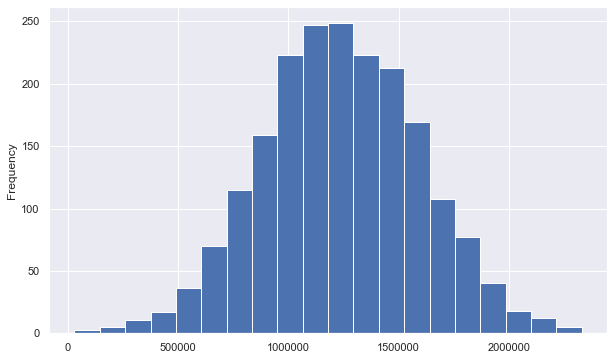

In [113]:
y_test.plot(kind='hist',bins=20,figsize=(10,6))

## Building Linear Regression Model

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
lr.intercept_

-2640159.796851911

In [124]:
lr.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [125]:
#X_train.columns
pd.DataFrame(data=lr.coef_,index=X_train.columns,columns = ['Coef'])

,Coef
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## PREDICTIONS

In [126]:
#Calculate Predictions
pred = lr.predict(X_test)

In [135]:
pred

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [136]:
type(pred)

numpy.ndarray

In [ ]:
#Capture the Predicted and Actual in a single Dataframe

In [139]:
pred_df = pd.DataFrame(pred,columns=['Predicted_Value'])

In [141]:
pred_df

,Predicted_Value
0,1.260961e+06
1,8.275888e+05
2,1.742421e+06
3,9.746254e+05
4,9.987178e+05
...,...
1995,1.515043e+06
1996,7.460118e+05
1997,3.721914e+05
1998,1.365217e+06


In [143]:
type(y_test)

pandas.core.series.Series

In [178]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [179]:
#Change the index so that it is aligned with pred_df indexes and hence can be concatenated
y_test.index = np.arange(0,2000)


In [180]:
y_test

0       1.251689e+06
1       8.730483e+05
2       1.696978e+06
3       1.063964e+06
4       9.487883e+05
            ...     
1995    1.489520e+06
1996    7.777336e+05
1997    1.515271e+05
1998    1.343824e+06
1999    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [181]:
y_test_df = pd.DataFrame(y_test,columns=['Price'])

In [182]:
y_test_df

,Price
0,1.251689e+06
1,8.730483e+05
2,1.696978e+06
3,1.063964e+06
4,9.487883e+05
...,...
1995,1.489520e+06
1996,7.777336e+05
1997,1.515271e+05
1998,1.343824e+06


In [183]:
df2 = pd.concat([pred_df,y_test_df],axis=1)

In [184]:
df2

,Predicted_Value,Price
0,1.260961e+06,1.251689e+06
1,8.275888e+05,8.730483e+05
2,1.742421e+06,1.696978e+06
3,9.746254e+05,1.063964e+06
4,9.987178e+05,9.487883e+05
...,...,...
1995,1.515043e+06,1.489520e+06
1996,7.460118e+05,7.777336e+05
1997,3.721914e+05,1.515271e+05
1998,1.365217e+06,1.343824e+06


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


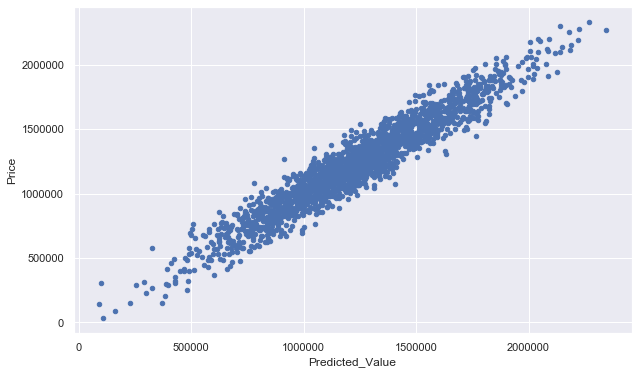

In [187]:
#Print the Scatter plot between Predicted and Actual Values
df2.plot(kind='scatter',x='Predicted_Value',y='Price',figsize=(10,6))

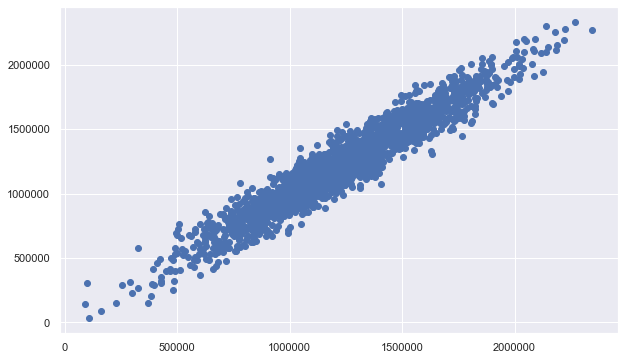

In [188]:
# We can display the scatter plot from the original data Series 'y_test' and ndarray 'pred'
plt.figure(figsize=(10,6))
plt.scatter(pred,y_test)

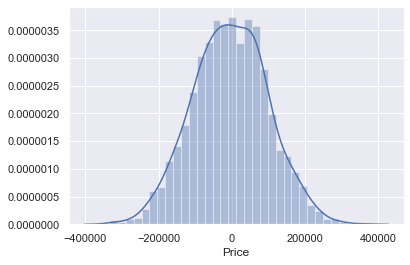

In [189]:
#Plot the Distibution of the residual i.e. difference between Actual Value and Predicted Value
sns.distplot(y_test-pred)

## Model Evaluation

In [192]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [194]:
mean_absolute_error(y_test,pred)

82288.22251914957

In [195]:
mean_squared_error(y_test,pred)

10460958907.209507

In [196]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

102278.82922291156

# Linear Regression Project Work

Problem Statement: 
----------------------------
You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



About Data
----------------
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

1. Avg. Session Length: Average session of in-store style advice sessions.
2. Time on App: Average time spent on App in minutes
3. Time on Website: Average time spent on Website in minutes
4. Length of Membership: How many years the customer has been a member.
5. Email : Email of the Customer
6. Address : Address of the Customer
7. Yearly Amount Spent : Amount spent by Customer in a Year
8. Avatar : Choie of the customer

Please note that the data is dummy data and is doesn't represent actual data.

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [200]:
#Read Ecommerce Customer Data into a DataFrame
cust = pd.read_csv('Ecommerce Customers')

In [201]:
cust.shape

(500, 8)

In [64]:
cust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [65]:
cust.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [69]:
cust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [68]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


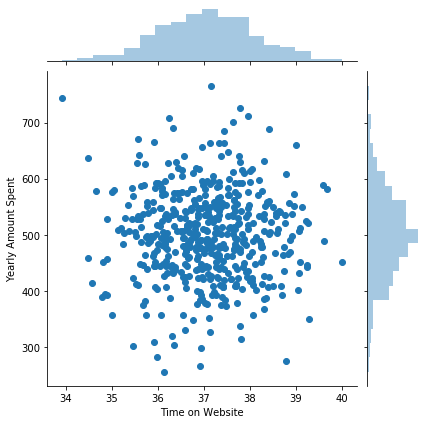

In [70]:
sns.jointplot(data = cust, x ='Time on Website', y = 'Yearly Amount Spent')

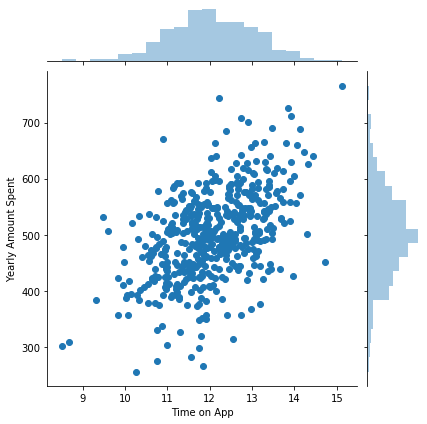

In [71]:
sns.jointplot(data = cust, x = 'Time on App', y = 'Yearly Amount Spent')

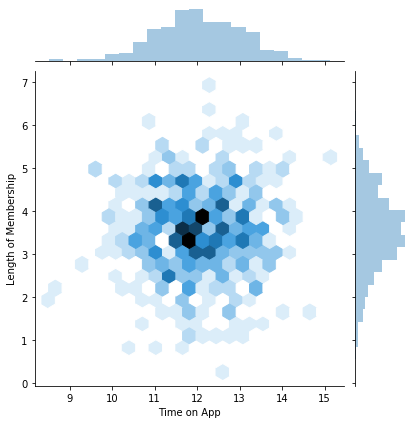

In [75]:
sns.jointplot(data = cust, x = 'Time on App', y = 'Length of Membership',kind  ='hex')

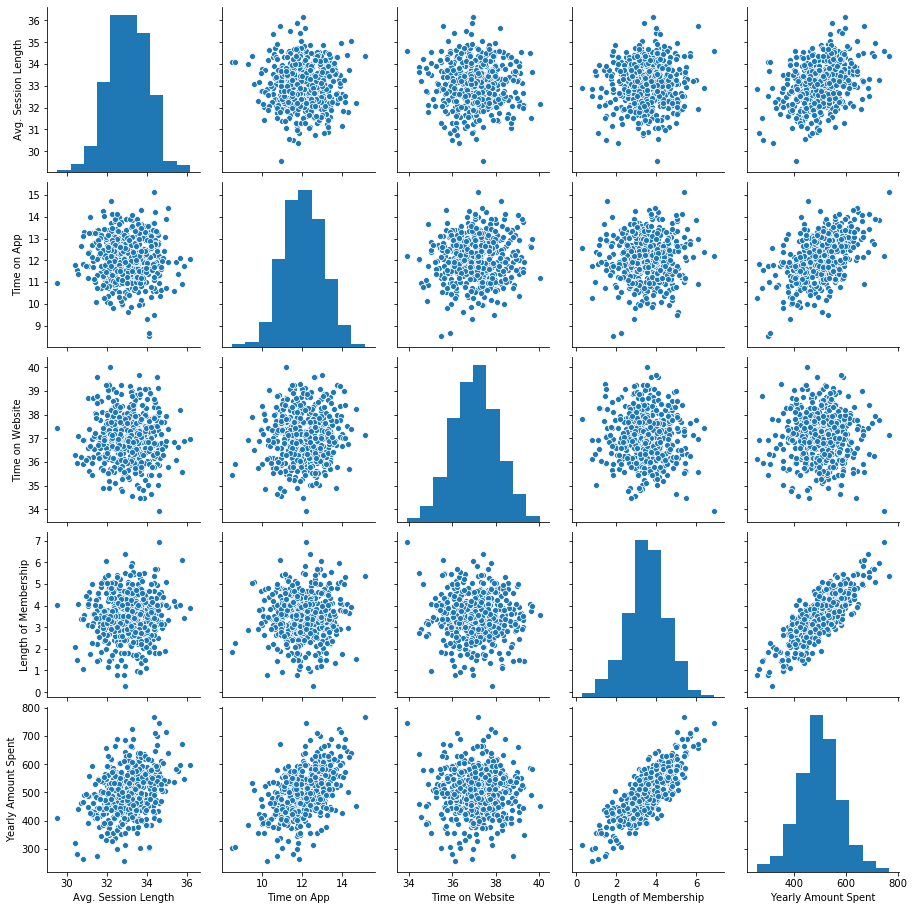

In [76]:
sns.pairplot(cust)

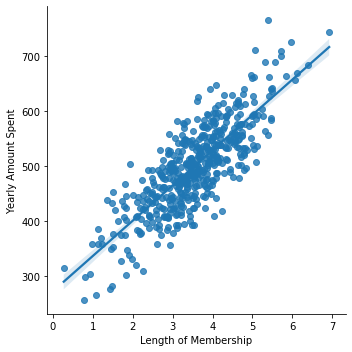

In [77]:
sns.lmplot(data = cust, x = 'Length of Membership', y = 'Yearly Amount Spent')

In [78]:
cust.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [79]:
y = cust['Yearly Amount Spent']

In [80]:
X = cust[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [82]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lr.intercept_

-1047.9327822502385

In [88]:
lr.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [91]:
pd.DataFrame(lr.coef_,index =['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'],columns = ['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [92]:
pred = lr.predict(X_test)

In [93]:
pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

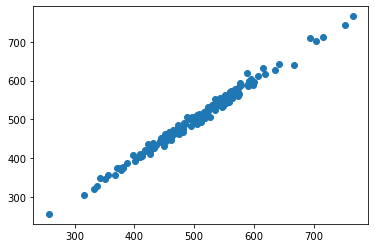

In [94]:
plt.scatter(pred,y_test)

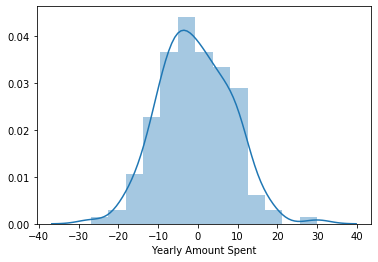

In [95]:
sns.distplot(y_test-pred)

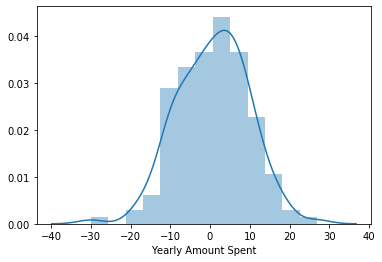

In [96]:
sns.distplot(pred- y_test)

In [97]:
from sklearn import metrics

print('MAE : ',metrics.mean_absolute_error(y_test,pred))
print('MSE : ',metrics.mean_squared_error(y_test,pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE :  7.22814865343082
MSE :  79.81305165097419
RMSE :  8.93381506697862
